In [1]:
#imports
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
#professor code for plotting
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

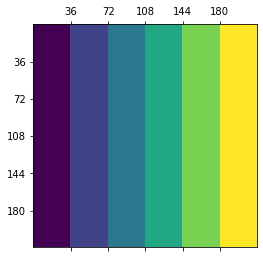

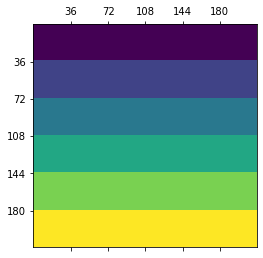

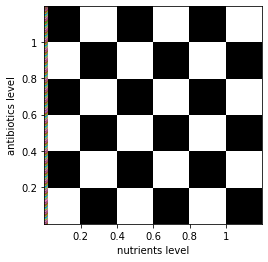

In [75]:
#where it needs fixing
#we can change if you would like how much or how little the placement of antibiotics is/color
#see stack overflow link for example
#need help combining to one board and making bacteria on the board
class board():
    
    __slots__ = ['nrows', 'ncols', '_nutrients', '_antibiotics', '_toxins', '_bacteria']
    
    
    def __init__(self, nrows = 9, ncols = 9):
        '''
        Initializes board with given rows and columns
        creates nutrients, anti, toxins, and bacteria private attributes
        currently initializes bacteria in column 0, could easily change later
        '''
        self.nrows = nrows
        self.ncols = ncols
        self._nutrients = np.zeros((self.nrows,self.ncols))
        self._antibiotics = np.zeros((self.nrows,self.ncols))
        self._toxins = np.zeros((self.nrows,self.ncols))
        self._bacteria = np.full([self.nrows,self.ncols], None)
        
        #currently initializes bacteria in column 0
        for y_val in range(nrows):
            self._bacteria[y_val,0] = bacteria(0,y_val)
        #print("nutrient initialization: (antibiotics and toxins have same init)")
        #print(self._nutrients)
        #print('\n')
        #print("bacteria locations:")
        #print(self._bacteria)
        self.nutrients()
        self.antibiotics()
    
    def nutrients(self):
        '''
        displays nutrients attribute with random nonzero entry added
        '''
        #a = np.random.randint(0,self.nrows)
        #b = np.random.randint(0,self.ncols)
        #self._nutrients[a][b] = np.random.random()
        #nutrients = nutrients.reshape((self.nrows, self.ncols))
        #row_labels = range(self.nrows)
        #col_labels = range(self.ncols)
          
        for col in range(self.ncols):
            if col < self.ncols/6:
                self._nutrients[:,col] = 0
            elif col < 2*self.ncols/6:
                self._nutrients[:,col] = .2
            elif col < 3*self.ncols/6:
                self._nutrients[:,col] = .4
            elif col < 4*self.ncols/6:
                self._nutrients[:,col] = .6
            elif col < 5*self.ncols/6:
                self._nutrients[:,col] = .8
            else:
                self._nutrients[:,col] = 1
        
        plt.matshow(self._nutrients)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,x_ticks)
        plt.yticks(y_ticks,y_ticks)
       # plt.xticks(range(self.ncols), range(self.ncols))
       # plt.yticks(range(self.nrows), range(self.nrows))
        plt.show()
        return

    def antibiotics(self):
        '''
        displays antibiotics attribute with random nonzero entry added
        '''
        #c = np.random.randint(0,self.nrows)
        #d = np.random.randint(0,self.ncols)
        #self._anti[c][d] = np.random.random()
        #anti = anti.reshape((self.nrows, self.ncols))
        #row_labels = range(self.nrows)
        #col_labels = range(self.ncols)
        
        for row in range(self.nrows):
            if row < self.nrows/6:
                self._antibiotics[row,:] = 0
            elif row < 2*self.nrows/6:
                self._antibiotics[row,:] = .2
            elif row < 3*self.nrows/6:
                self._antibiotics[row,:] = .4
            elif row < 4*self.nrows/6:
                self._antibiotics[row,:] = .6
            elif row < 5*self.nrows/6:
                self._antibiotics[row,:] = .8
            else:
                self._antibiotics[row,:] = 1
        
        plt.matshow(self._antibiotics)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,x_ticks)
        plt.yticks(y_ticks,y_ticks)
        #plt.xticks(range(self.ncols), range(self.ncols)) too many tics
        #plt.yticks(range(self.nrows), range(self.nrows))
        plt.show()
        return
    
    def get_nutrients(self, x, y):
        '''
        returns nutrient value at point
        '''
        return self._nutrients[x,y]
    
    def get_antibiotics(self, x, y):
        '''
        returns antibiotic value at point
        '''
        return self._antibiotics[x,y]
    
    def add_bacteria(self, x, y, to_add):
        '''
        adds a bacteria at point
        '''
        self._bacteria[x,y] = to_add
        return
        
    def toxins():#may take out
        pass
    
    def update(self):
        '''
        updates the board
        '''
        #currently only updates bacteria
        for row in range(self.nrows):
            for col in range(self.ncols):
                if self._bacteria[row,col] is not None:
                    check = self._bacteria[row,col].update(self)
                    if check:
                        self._bacteria[row,col] = None
                         
    def in_region(self,row,col):
        '''
        returns boolean representing if a location is within the depicted region's boundaries
        '''
        if row <= self.nrows and row >= 0 and col <= self.ncols and col >= 0:
            return True
        else:
            return False
        
    def get_openings(self,row,col):
        '''
        Von Neumann neighborhood, meaning all spaces next to it, including diagonals
        Returns empty neighbors on bacteria board
        '''
        surroundings = [(row-1, col), (row, col-1), (row+1, col), (row, col+1), (row-1,col-1), (row-1,col+1), (row+1,col-1), (row+1,col+1)]

        open_locations = []
        for neighbor in surroundings:
            if self.in_region(neighbor[0], neighbor[1]) and self._bacteria[neighbor[0], neighbor[1]] is None:
                open_locations.append(neighbor)

        return open_locations
                
    
    def display(self):
        '''
        displays the board
        '''
        x = np.arange(0, 216, 1)
        y = np.arange(0, 216, 1)
        X, Y = np.meshgrid(x, y)
        extent = np.min(x), np.max(x), np.min(y), np.max(y)
        fig = plt.figure(frameon=False)
        Z1 = np.add.outer(range(6), range(6)) % 2  # chessboard
        im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)
        
        #Z2 = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2 + Y**2))

        #im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
        #         extent=extent)
        for x_val in range(216):
            for y_val in range(216):
                if self._bacteria[y_val,x_val] is not None:
                    #self._bacteria[y_val,x_val].draw()
                    plt.scatter(x_val,y_val)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,[.2,.4,.6,.8,1])
        plt.yticks(y_ticks,[.2,.4,.6,.8,1])
        plt.ylabel("antibiotics level")
        plt.xlabel("nutrients level")
        plt.show()

c = board(216,216)
c.display()
#https://stackoverflow.com/questions/10194482/custom-matplotlib-plot-chess-board-like-table-with-colored-cells

In [59]:
class bacteria():
    
    __slots__ = ['x', 'y', 'antibiotic_resistance_gene', 'nutrient_gene', 'temperature_gene', 'immune_resistance_gene', 'mutation_rate', 'reproduction_rate']
    
    def __init__(self, x = random.randint(0,9),y = random.randint(0,9), anti = 0, nutri = 0, temp = 0, immune = 0, mutation_rate=0.1, reproduction_rate=0.1):
        """
        Creates new bacteria object with random position and genes
        :x: x position of bacteria
        :y: y position of bacteria
        :gene_seed: float value to add to all randomly initialized gene values
        :mutation_rate: the mutation rate for bacteria
        """
        self.x = x
        self.y = y
        
        #initialize all genes to random values between [0, 0.2] + gene_seed
        self.antibiotic_resistance_gene = np.random.rand()/5 + anti
        self.nutrient_gene = np.random.rand()/5 + nutri
        self.temperature_gene = np.random.rand()/5 + temp
        self.immune_resistance_gene = np.random.rand()/5 + immune
        
        self.mutation_rate = mutation_rate
        self.reproduction_rate = reproduction_rate
        
    
    def set_position(self, x, y):
        """
        Sets the position of self using passed arguments
        """
        self.x = x
        self.y = y
        return
    
    def movement(self, board):
        """
        Randomly move bacteria up to two units in the x and y directions based on nutrients and antibiotics
        """
        if self.x <= 2: # for nutrient moving towards because nutrient in columns
            randomstepx = random.randint(1,2) #take positive steps forward if it is in low nutrient section
        elif self.x == 3 or self.x == 4: # we can change these if we make the board a lot larger(by factor of 10)/may want to make it an input
            randomstepx = random.randint(0,1)# if it is in higher nutrient (0.6-0.8) can take small steps forward/stay put
        #elif self.x == 5: #if it is in high nutrient (1) stay put
        else:
            randomstepx = 0
            
        if self.y == 0: # for moving away from high antibiotics 
            randomstepy = 0 # you do not want to move from low antibiotics
        elif self.y == 1 or self.x == 2: 
            randomstepy = random.randint(-1,0)# if it is in mid antibiotic (0.2-0.4) can take small steps backward/stay put
        #elif self.y >= 3:
        else:
            randomstepy = random.randint(-2,0) #high antibiotic move backwards
            
            
        
        board._bacteria[self.y,self.x] = None
        self.x = self.x + randomstepx
        if self.x < 0:
            self.x = 0
        if self.x >= board.ncols:
            self.x = board.ncols - 1
        self.y = self.y + randomstepy
        if self.y < 0:
            self.y = 0
        if self.y >= board.nrows:
            self.y = board.nrows - 1
            
        board._bacteria[self.y,self.x] = self
        return
    
    def reproduce(self, board):
        """
        Returns a new bacteria with genes based off of parent (self)
        """
        if np.random.rand() < self.reproduction_rate:
            openings = board.get_openings(self.y, self.x)
            loc = random.randint(0,len(openings)-1)
            newbac = bacteria(openings[loc][1],openings[loc][0], self.antibiotic_resistance_gene, self.nutrient_gene, self.temperature_gene, self.immune_resistance_gene)
            return newbac
        return None
    
    
    def mutate(self):
        """
        Randomly calculate if bacteria will mutate
        If true, randomly add from a N(0, 0.1) distribution
        genes mutate independently
        """
        if np.random.rand() < self.mutation_rate:
            self.antibiotic_resistance_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.nutrient_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.temperature_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.immune_resistance_gene += 0.1 * np.random.randn()
    
    def death(self, the_board):
        """
        Calculate something related to the current conditions the bacteria is experiencing to see if it dies based on its genes.
        :external_condition_value: could be anything such as temperature, antibiotics level, white blood cell count, etc
        """
        if self.antibiotic_resistance_gene < the_board.get_antibiotics(self.x,self.y):
            return True
        if self.nutrient_gene < the_board.get_nutrients(self.x,self.y):
            return True
        #implement temperature and immune resistance
        return False
    
    def update(self, board):
        '''
        updates a bacteria
        calls all other methods (movement, reproduce, mutate, death, etc)
        returns boolean for if bacteria has died
        '''
        if self.death(board):
            return True
        self.movement(board)
        self.mutate()
        new_bac = self.reproduce(board)
        if new_bac is not None:
            board._bacteria[new_bac.y,new_bac.x] = new_bac
        return False
    
    def draw(self):
        image_path = 'bacteria.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.2)
        return

#we may want to just use dots instead of the picture^^^

In [41]:
b = bacteria()
allbac = []
allbac.append(b)
for d in range(50):
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    
    for ba in range(np.size(allbac)):
        allbac[ba].movement()
        allbac[ba].draw()
    if np.mod(d,10) == 1:
        for i in range(np.size(allbac)):
            cell = allbac[i].reproduce()
            allbac.append(cell)
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)

TypeError: movement() missing 1 required positional argument: 'board'

<Figure size 432x432 with 0 Axes>

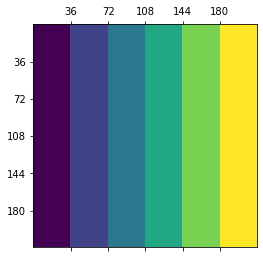

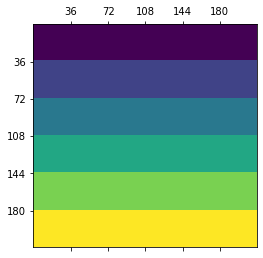

bacteria locations:
[[<__main__.bacteria object at 0x7f96492384c0> None None ... None None
  None]
 [<__main__.bacteria object at 0x7f9649238458> None None ... None None
  None]
 [<__main__.bacteria object at 0x7f96492385f8> None None ... None None
  None]
 ...
 [<__main__.bacteria object at 0x7f9649224f50> None None ... None None
  None]
 [<__main__.bacteria object at 0x7f9649224e18> None None ... None None
  None]
 [<__main__.bacteria object at 0x7f9649224db0> None None ... None None
  None]]


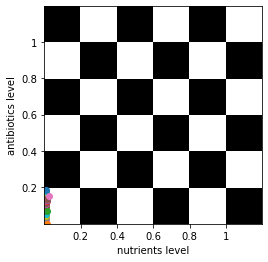

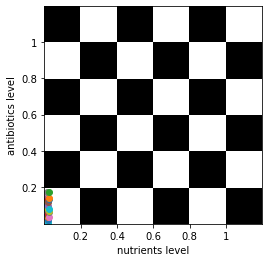

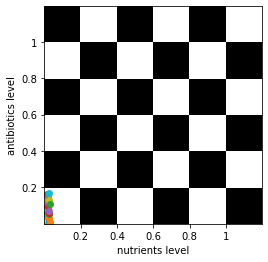

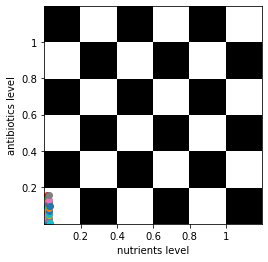

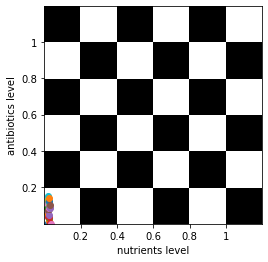

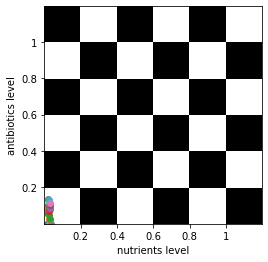

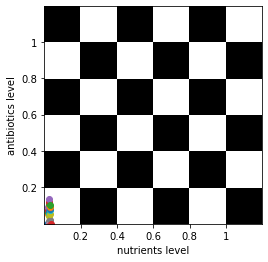

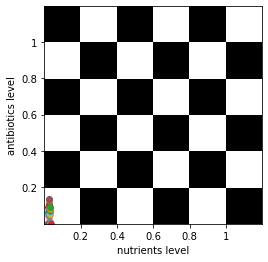

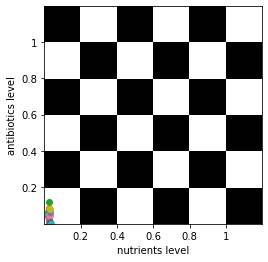

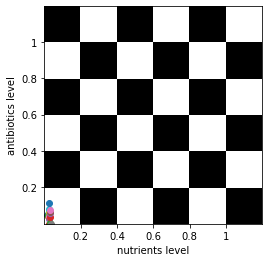

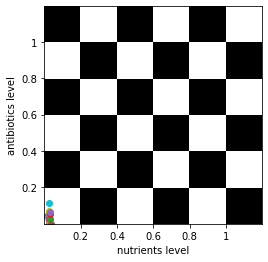

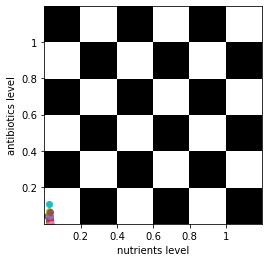

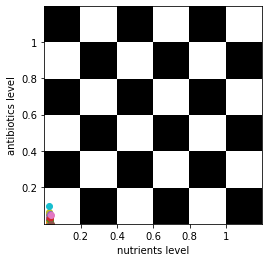

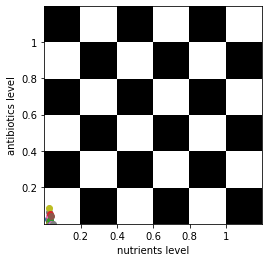

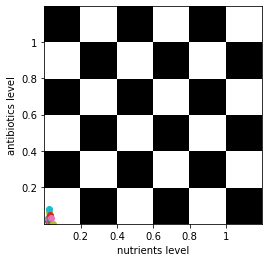

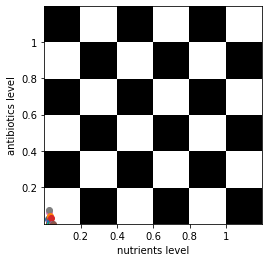

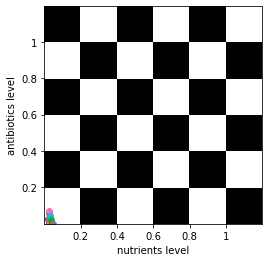

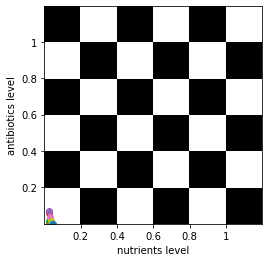

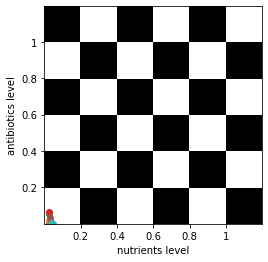

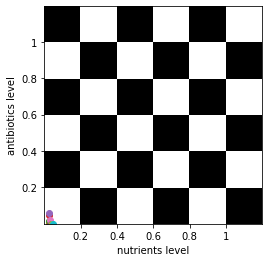

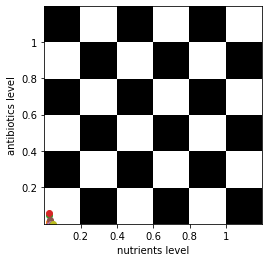

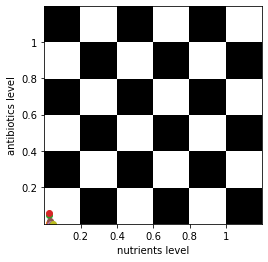

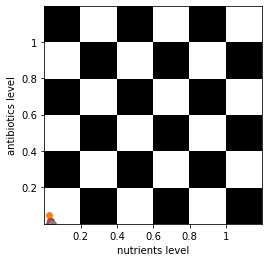

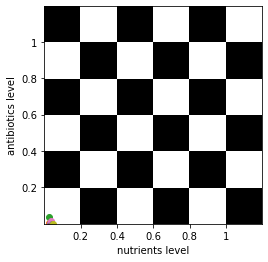

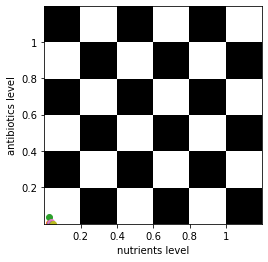

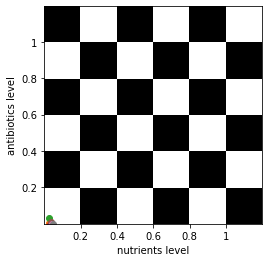

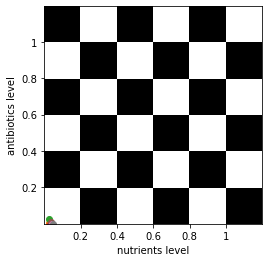

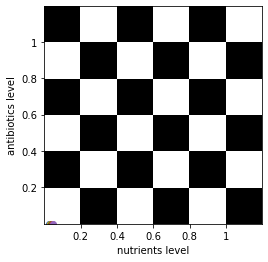

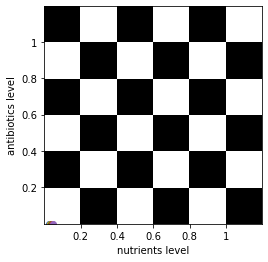

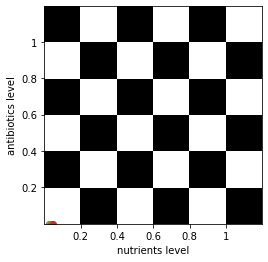

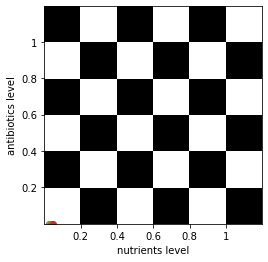

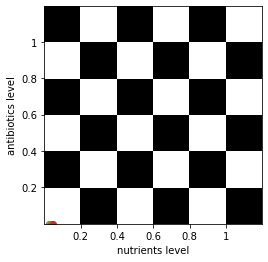

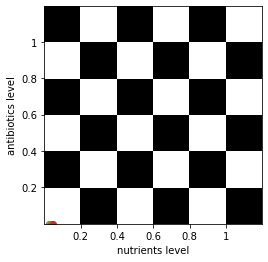

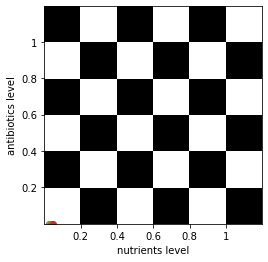

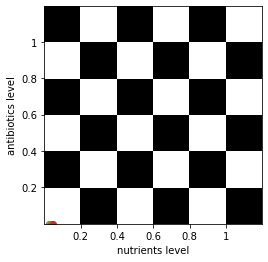

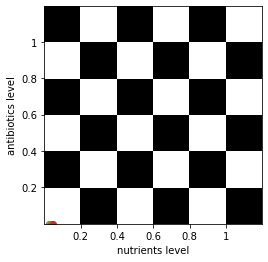

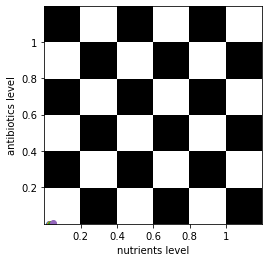

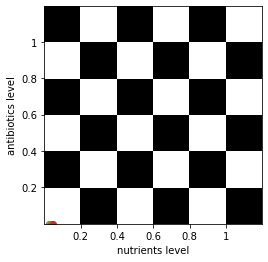

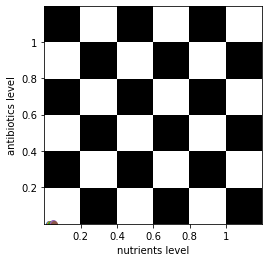

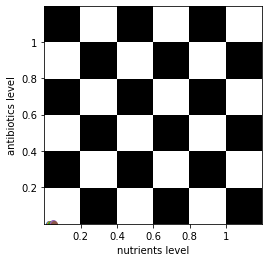

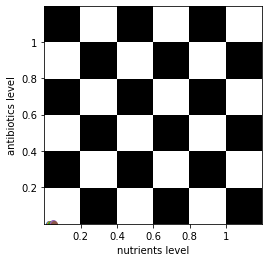

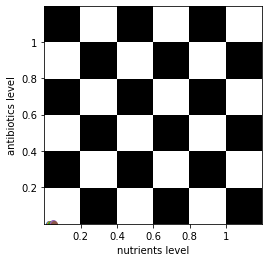

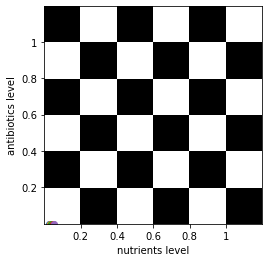

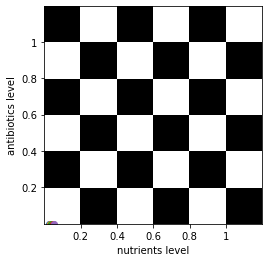

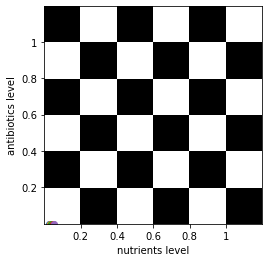

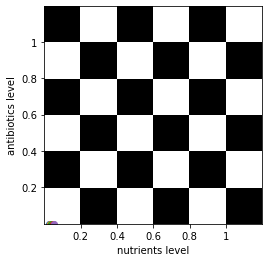

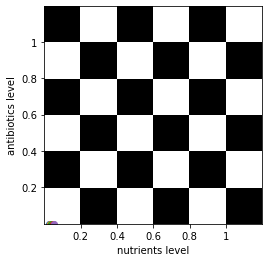

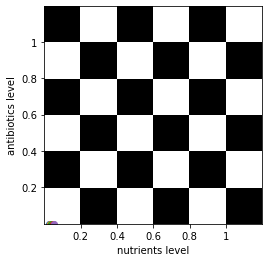

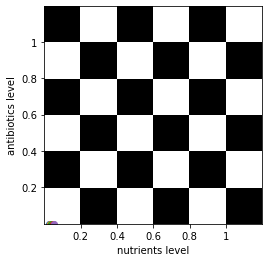

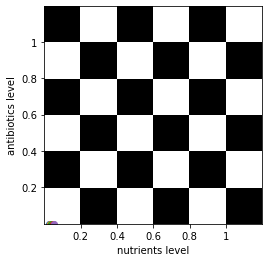

In [76]:
height = 216
width = 216
iterations = 50
table = board(height, width)
print("bacteria locations:")
print(table._bacteria)

for i in range(iterations):
    table.update()
    table.display()